In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import open3d as o3d

from utils import *

In [4]:
recording_dir = "/home/yunzhu/Documents/project_phystouch/phystouch/data_recording/data"
recording_dir = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/intrinsics_extrinsics/data/20210719_2/"
recording = "20210719_175830"
recording = "20210719_180040"
cameras_dir = os.path.join(recording_dir, "20210719_180040")


cameras = ["020122061233", "821312060044", "020122061651", "821312062243"]

intrinsics = Intrinsics(cameras_dir)
extrinsics = Extrinsics(cameras_dir)
rgbds = RGBD(cameras_dir)
stitched_pcd = Stitching_pcds(intrinsics, extrinsics, rgbds, cameras)
apriltags = AprilTags(cameras_dir, intrinsics, extrinsics, cameras=cameras)
stitched_pcd = Stitching_pcds(intrinsics, extrinsics, rgbds, cameras)

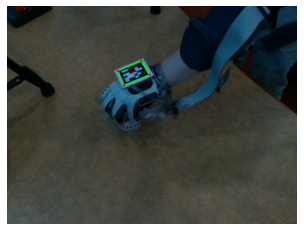

In [5]:
apriltags.image(idx="000350", camera="821312062243")

# Tactile data

In [140]:
import sys
sys.path.insert(1, 'C:/Users/lucas/Desktop/UPC/MIT/manopth')

from manus.utils import Pressure

In [141]:
class FrameConverter:
    """Converts between different frames per second
    Attributes
    ----------
    ts_touch: list
        Time stamps of pressure data
    time_diff: float
        Time difference (in seconds) between manus and pressure. Expects pressure to start before, if not change sign.
    fps_m: int/float
        FPS of manus glove
    video_diff: float
        Time difference (in seconds) between video and pressure. Expects pressure to start before, if not change sign.
    fps_v: loat
        FPS of video
    Methods
    -------
    pressure_to_manus
        Change pressure frame to manus frame
    manus_to_pressure
        Change manus frame to pressure frame
    """

    def __init__(self, ts_touch, time_diff=4.193, fps_m=60, video_diff=0.556, fps_v=30):
        self.t_touch = ts_touch - ts_touch[0]
        self.time_diff = time_diff
        self.fps_m = fps_m
        self.video_diff = video_diff
        self.fps_v = fps_v

    def pressure_to_manus(self, frame_p):
        time_p = self.t_touch[frame_p]
        time_m = time_p - self.time_diff
        frame_m = time_m * self.fps_m

        return round(frame_m)

    def manus_to_pressure(self, frame_m):
        time_m = frame_m / self.fps_m
        time_p = time_m + self.time_diff
        frame_p = (np.abs(self.t_touch - time_p)).argmin()

        return frame_p

    def pressure_to_video(self, frame_p):
        time_p = self.t_touch[frame_p]
        time_v = time_p - self.video_diff
        frame_v = time_v * self.fps_v

        return round(frame_v)

    def video_to_pressure(self, frame_v):
        time_v = frame_v / self.fps_v
        time_p = time_v + self.video_diff
        frame_p = (np.abs(self.t_touch - time_p)).argmin()

        return frame_p

In [ ]:
h5ply_pth= os.path.join(recording_dir, "07192021_1.hdf5")
pressure = Pressure(h5ply_pth, lim_low=3, lim_high=50)
frameConverter = FrameConverter(pressure.ts_touch, video_diff=28.839, fps_v=30)

In [217]:
h5ply_pth= os.path.join(recording_dir, "07192021_2.hdf5")
pressure = Pressure(h5ply_pth, lim_low=3, lim_high=50)
frameConverter = FrameConverter(pressure.ts_touch, video_diff=4.06, fps_v=29.62)

In [143]:
frameConverter.video_to_pressure(0)

6

In [130]:
frameConverter.video_to_pressure(end)




1294

In [134]:
frameConverter.pressure_to_video(1294)

2476

In [145]:
pressure.ts_touch - pressure.ts_touch[0]

array([ 0.        ,  0.10973716,  0.18253016,  0.28426099,  0.35806513,
        0.4577961 ,  0.53060007,  0.63132906,  0.70513105,  0.80087996,
        0.872684  ,  0.97142196,  1.04474807,  1.14402795,  1.21583605,
        1.31457496,  1.39035106,  1.48509502,  1.5628891 ,  1.65521312,
        1.72501016,  1.80930495,  1.88762212,  1.9813571 ,  2.05715704,
        2.16686296,  2.24466205,  2.34340906,  2.41819   ,  2.51892209,
        2.59372211,  2.69445205,  2.77077103,  2.85609913,  2.92992401,
        3.01413107,  3.0889411 ,  3.19166803,  3.26646495,  3.36320496,
        3.43800902,  3.53426909,  3.60758996,  3.70492506,  3.78469801,
        3.87146616,  3.95025611,  4.04699802,  4.11980104,  4.21655512,
        4.29036498,  4.39008713,  4.46587706,  4.56361318,  4.63642001,
        4.7361691 ,  4.81395602,  4.91168594,  4.98611999,  5.08186316,
        5.15864515,  5.25040197,  5.32220197,  5.42592716,  5.50073004,
        5.59946299,  5.67226911,  5.77299809,  5.84979415,  5.94

In [149]:
pressure.ts_touch[0]

1626714039.44448

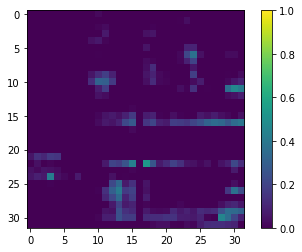

In [39]:
pressure.get_figure(40)

In [13]:
pressure.ts_touch[-1] - pressure.ts_touch[0]

111.36547517776489

1295

In [146]:
from scipy.signal import find_peaks
pressures = []
frames_m = []


for frame_m in range(0, len(pressure.ts_touch)):
    pressures.append(pressure[frame_m].sum())
    
    frames_m.append(frame_m)

    

frames_m = np.array(frames_m)

pressures = np.array(pressures)

# Find peaks
peak_indices, peak_heights = find_peaks(pressures, height=50, distance=10)

grasp_m_frames = frames_m[peak_indices]


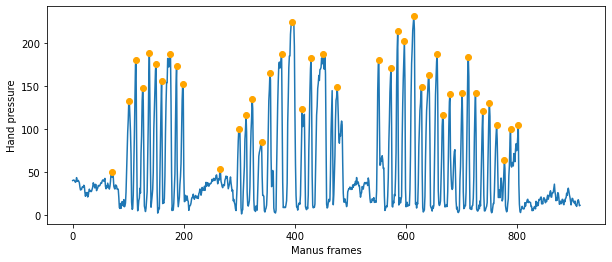

In [147]:
%matplotlib inline
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot()

ax.plot(frames_m, pressures)
ax.plot(grasp_m_frames, pressures[peak_indices], 'o', color='orange')


ax.set_ylabel("Hand pressure")
ax.set_xlabel("Manus frames")
plt.show()

In [151]:
grasp_m_frames

array([ 70, 101, 114, 126, 138, 150, 160, 176, 187, 198, 265, 300, 312,
       323, 340, 355, 376, 395, 413, 429, 451, 476, 551, 573, 585, 597,
       614, 628, 641, 656, 666, 679, 701, 712, 725, 738, 750, 763, 777,
       788, 802])

In [152]:
pressure.ts_touch[grasp_m_frames] - pressure.ts_touch[0]

array([ 6.02286506,  8.67940807,  9.760571  , 10.77196598, 11.74889112,
       12.74135399, 13.57023096, 14.945122  , 15.85581613, 16.77937508,
       22.18900895, 25.13063097, 26.14642811, 27.08498406, 28.484303  ,
       29.78196907, 31.49046206, 33.06591916, 34.56303406, 35.88052607,
       37.68488407, 39.77970195, 45.92841506, 47.75306916, 48.78982401,
       49.79526305, 51.20454502, 52.36768007, 53.44931912, 54.73065209,
       55.5940311 , 56.68415117, 58.55501509, 59.47862101, 60.54634309,
       61.66535616, 62.70102811, 63.79167914, 64.94319797, 65.8557601 ,
       66.98833513])

In [215]:
possible_contacts = [169,201,228,256,279,347,376,625,655,682,763,809,906,939]

all_values = {}

frames = np.arange(29, 30.1, 0.01)
times = np.arange(4, 5, 0.01)

for frame_v in frames:
    for time_diff in times:
        diff = 0
        for contact in possible_contacts:

            idx = (np.abs(pressure.ts_touch[grasp_m_frames] - pressure.ts_touch[0] - contact/frame_v - time_diff)).argmin()

            frame_p = grasp_m_frames[idx]
            time_a = pressure.ts_touch[frame_p] - pressure.ts_touch[0] - contact/frame_v - time_diff
            diff += np.abs(time_a)
        all_values[frame_v, time_diff] = diff




In [216]:
min(all_values, key=all_values.get)

(29.620000000000097, 4.059999999999999)

In [209]:
min(all_values, key=all_values.get)

(29.600000000000023, 4.049999999999999)

In [197]:
all_values

{(30, 0.2805260658264155): 1.4219015439351406}

In [157]:
pressure.ts_touch[grasp_m_frames] - pressure.ts_touch[0] - 682/30 + 4.2

array([-12.51046828,  -9.85392526,  -8.77276233,  -7.76136735,
        -6.78444222,  -5.79197934,  -4.96310237,  -3.58821133,
        -2.67751721,  -1.75395826,   3.65567562,   6.59729764,
         7.61309477,   8.55165073,   9.95096966,  11.24863574,
        12.95712873,  14.53258583,  16.02970072,  17.34719273,
        19.15155074,  21.24636861,  27.39508173,  29.21973583,
        30.25649068,  31.26192972,  32.67121169,  33.83434674,
        34.91598579,  36.19731876,  37.06069776,  38.15081784,
        40.02168175,  40.94528767,  42.01300975,  43.13202283,
        44.16769478,  45.25834581,  46.40986463,  47.32242676,
        48.4550018 ])

70


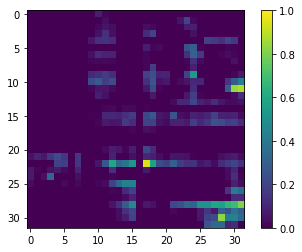

101


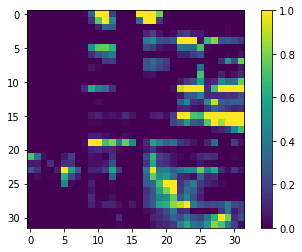

114


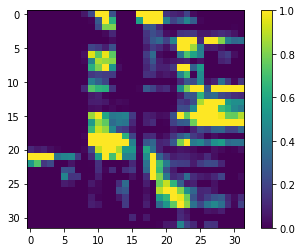

126


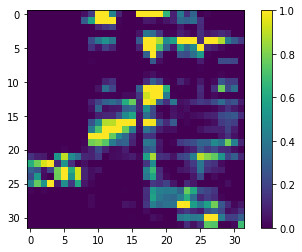

138


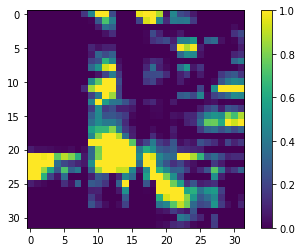

150


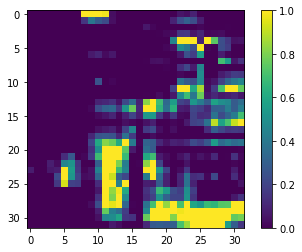

160


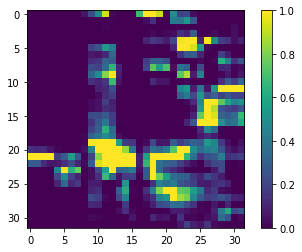

176


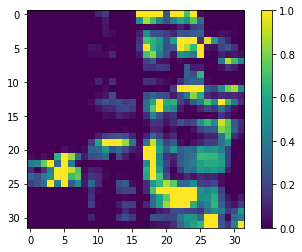

187


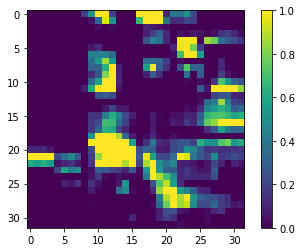

198


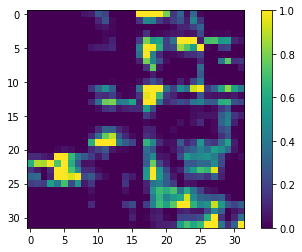

265


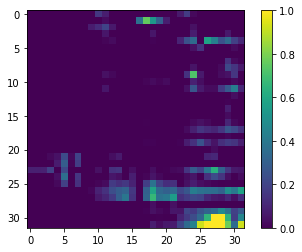

300


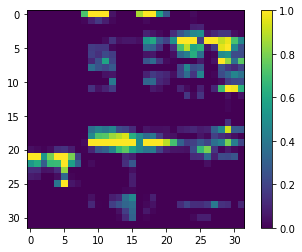

312


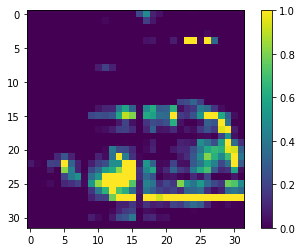

323


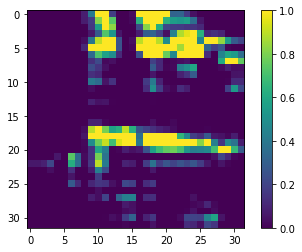

340


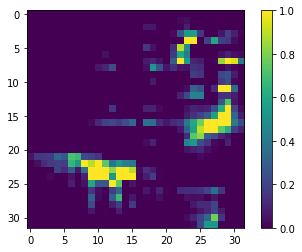

355


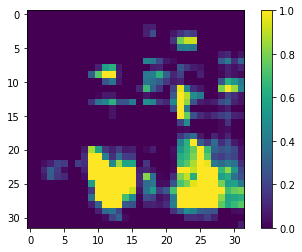

376


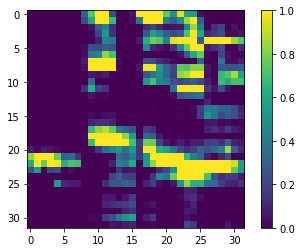

395


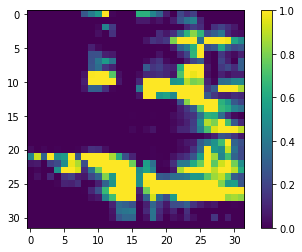

413


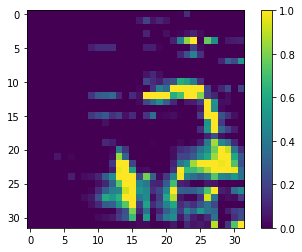

429


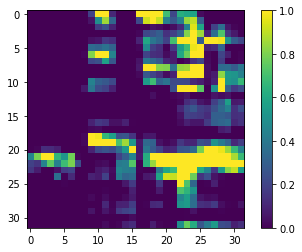

451


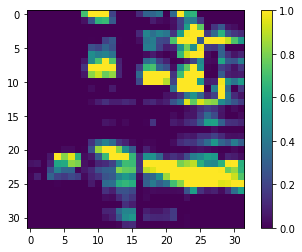

476


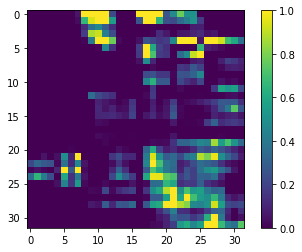

551


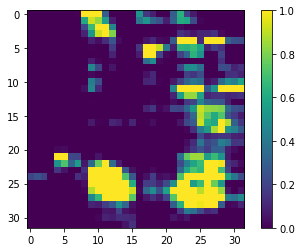

573


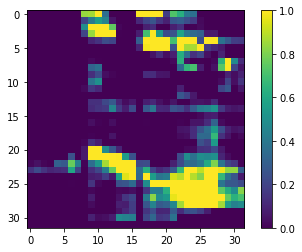

585


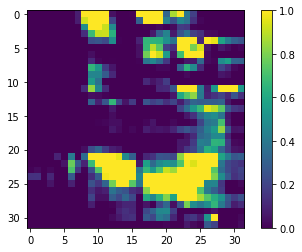

597


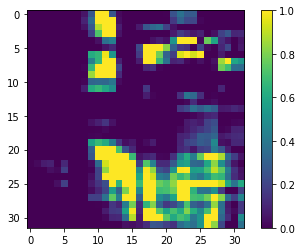

614


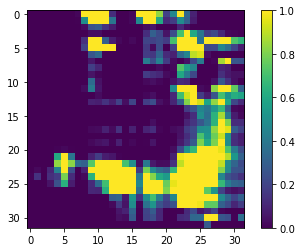

628


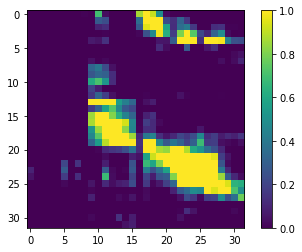

641


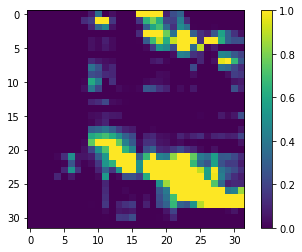

656


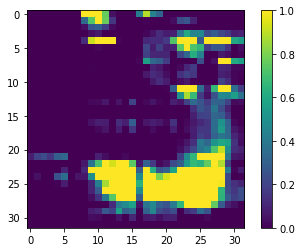

666


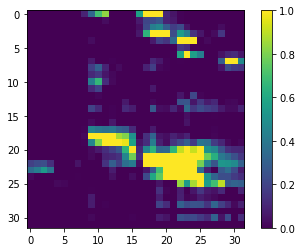

679


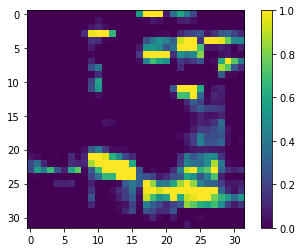

701


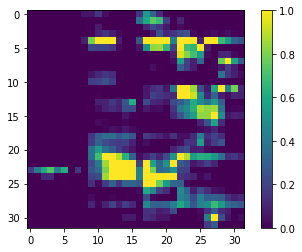

712


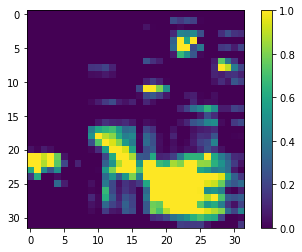

725


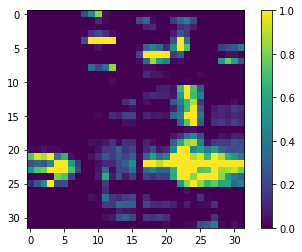

738


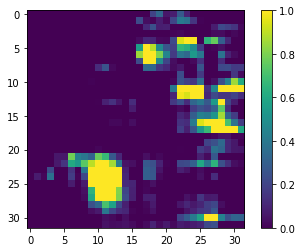

750


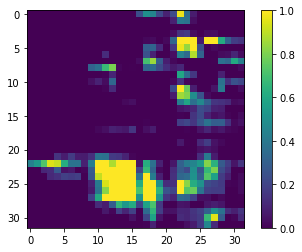

763


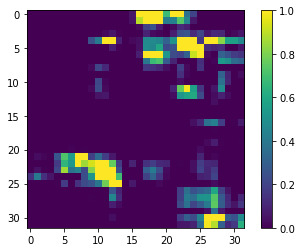

777


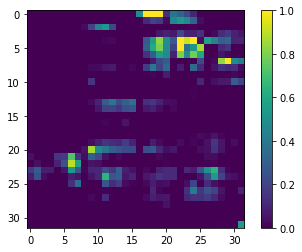

788


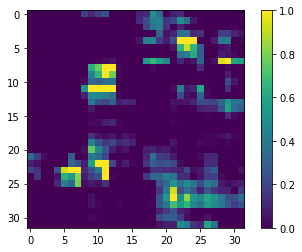

802


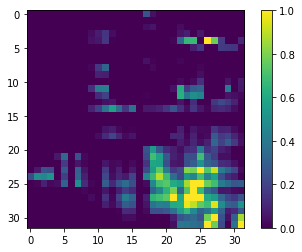

In [153]:
for grasp in grasp_m_frames:
    print(grasp)
    pressure.get_figure(grasp)

In [156]:
time_diff = 0.556

In [183]:
208 / (pressure.ts_touch[grasp_m_frames][9] - pressure.ts_touch[grasp_m_frames][2])

29.63467819115311

In [184]:
68 / (pressure.ts_touch[grasp_m_frames][8] - pressure.ts_touch[grasp_m_frames][6])

29.751680681429256

In [190]:
31 / (pressure.ts_touch[grasp_m_frames][3] - pressure.ts_touch[grasp_m_frames][2])

30.65073555584996

# Save pressure

In [233]:
tactile_dir = os.path.join(apriltags.cameras_dir, "imgs", "pressure_img_29.62_4.06")

if not os.path.exists(tactile_dir):
    os.makedirs(tactile_dir)

#start = frameConverter.pressure_to_video(0)
#end = frameConverter.pressure_to_video(len(frameConverter.t_touch) - 1)

for frame_v in range(0, 1758):
    frame_p = frameConverter.video_to_pressure(frame_v)
    
    fig = pressure.get_figure(frame_p, show=False)
    img_pth = os.path.join(tactile_dir, f"img_{frame_v}")
    fig.savefig(img_pth)